# Designing the Simulation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_simulation(rate, time_duration, show_visualization=True):

    if isinstance(rate, int):
        # Generating the number of events that occur in the given time duration
        num_events = np.random.poisson(rate * time_duration)
        
        # Simulating the times at which events occur
        event_times = np.sort(np.random.uniform(0, time_duration, num_events))
        
        # Calculate inter-arrival times
        inter_arrival_times = np.diff(event_times)

        if show_visualization:
            fig, axs = plt.subplots(1, 2, figsize=(15, 6))
            fig.suptitle(f'Poisson Process Simulation (λ = {rate}, Duration = {time_duration} seconds)\n', fontsize=16)

            axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color='blue')
            axs[0].set_xlabel('Time')
            axs[0].set_ylabel('Event Number')
            axs[0].set_title(f'Poisson Process Event Times\nTotal: {num_events} events\n')
            axs[0].grid(True)

            # Plot the histogram of inter-arrival times in the first subplot
            axs[1].hist(inter_arrival_times, bins=20, color='green', alpha=0.5)
            axs[1].set_xlabel('Inter-Arrival Time')
            axs[1].set_ylabel('Frequency')
            axs[1].set_title(f'Histogram of Inter-Arrival Times\nMEAN: {np.mean(inter_arrival_times):.2f} | STD: {np.std(inter_arrival_times):.2f}\n')
            axs[1].grid(True)
            
            plt.tight_layout()
            plt.show()

        else:
            return num_events, event_times, inter_arrival_times

    elif isinstance(rate, list):

        num_events_list = []
        event_times_list = []
        inter_arrival_times_list = []

        if show_visualization:
            # If show_visualization is True, create a single figure for all rates
            fig, axs = plt.subplots(1, 2, figsize=(15, 6))
            fig.suptitle(f'Poisson Process Simulation (Duration = {time_duration} seconds)\n', fontsize=16)

            axs[0].set_xlabel('Time')
            axs[0].set_ylabel('Event Number')
            axs[0].set_title(f'Poisson Process Event Times')
            axs[0].grid(True)

            axs[1].set_xlabel('Inter-Arrival Time')
            axs[1].set_ylabel('Frequency')
            axs[1].set_title(f'Histogram of Inter-Arrival Times')
            axs[1].grid(True)

            # Loading the 'tab20' color palette
            color_palette = plt.colormaps['tab20']

            # Creating a list of colors from the palette
            colors = [color_palette(i) for i in range(20)]

            for n, individual_rate in enumerate(rate):
                # Generating the number of events that occur in the given time duration
                num_events = np.random.poisson(individual_rate * time_duration)
                num_events_list.append(num_events)

                # Simulating the times at which events occur
                event_times = np.sort(np.random.uniform(0, time_duration, num_events))
                event_times_list.append(event_times)
                
                # Calculate inter-arrival times
                inter_arrival_times = np.diff(event_times)
                inter_arrival_times_list.append(inter_arrival_times)

                axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color=colors[n], label=f'λ = {individual_rate}, Total Events: {num_events}')
                axs[1].hist(inter_arrival_times, bins=20, color=colors[n], alpha=0.5, label=f'λ = {individual_rate}, MEAN: {np.mean(inter_arrival_times):.2f}, STD: {np.std(inter_arrival_times):.2f}')

            axs[0].legend()
            axs[1].legend()

            plt.tight_layout()
            plt.show()

        else:
            # If show_visualization is False, store data and return it
            for individual_rate in rate:
                num_events = np.random.poisson(individual_rate * time_duration)
                num_events_list.append(num_events)

                event_times = np.sort(np.random.uniform(0, time_duration, num_events))
                event_times_list.append(event_times)
                
                inter_arrival_times = np.diff(event_times)
                inter_arrival_times_list.append(inter_arrival_times)

            return num_events_list, event_times_list, inter_arrival_times_list


# Performing the Simulation:

## Non-Sequential Simulation

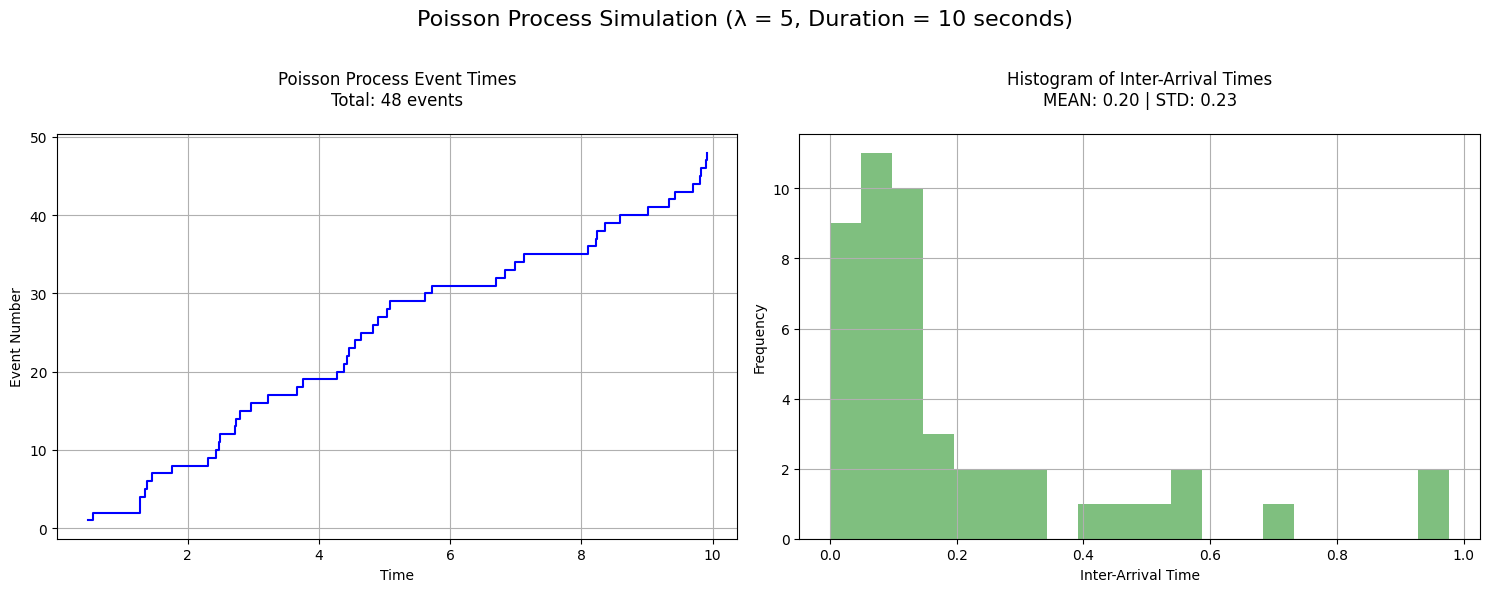

In [6]:
average_rate = 5  # Average rate of events per unit time (λ)
simulation_time = 10  # Total simulation time
poisson_simulation(average_rate, simulation_time)

## Sequential Simulation

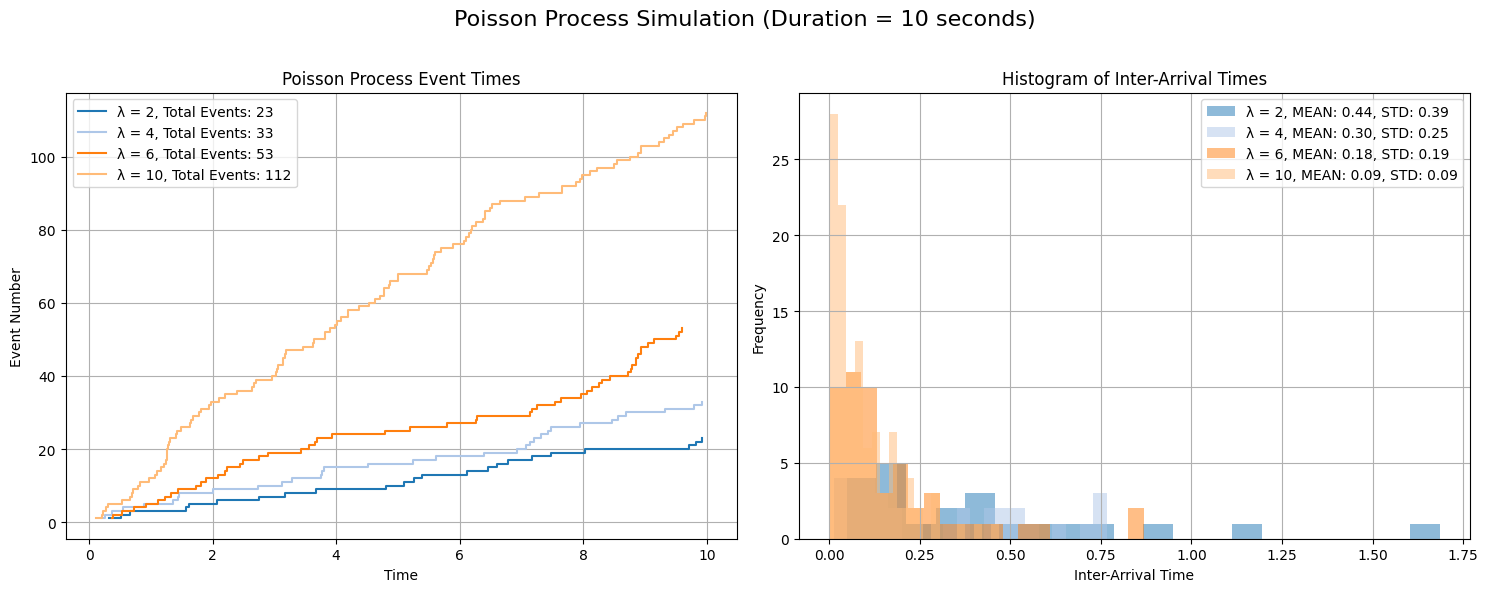

In [37]:
average_rate = [ 2, 4, 6, 10 ] # Average rates of events per unit time (λ)
simulation_time = 10  # Total simulation time
poisson_simulation(average_rate, simulation_time)